In [2]:
import pandas as pd
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import pmagpy.coefficients as cf
import matplotlib
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap
from pylab import meshgrid  
import numpy as np
from matplotlib import cm
%matplotlib inline
from IPython.display import Image

In [4]:
coeffs=pd.read_excel('IGRF12coeffs.xls',header=3)
coeffs.rename(columns={'n':'l'},inplace=True)
coeffs['h']=coeffs[2015]
coeffs['h'][coeffs['g/h']=='g']=''
coeffs['h'][coeffs['m']==0]=0
coeffs['g']=coeffs[2015]
coeffs['g'][coeffs['g/h']=='h']=''
coeffs_h=coeffs[coeffs.h!='']
coeffs_g=coeffs[coeffs.g!='']
coeffs_h=coeffs_h[['l','m','h']]
coeffs_g=coeffs_g[['l','m','g']]
coeffs_2015=pd.merge(coeffs_g,coeffs_h,on=['l','m'])
coeffs_2015.to_csv('coeffs_2015.txt',sep='\t',index=None)


/Users/ltauxe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/ltauxe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/ltauxe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [5]:
models,coeffs=cf.get_igrf12()

In [7]:
!plot_magmap.py -age 2018 -el B -cm rainbow -fmt eps
!mv igrf2018.0.eps igrf2018.B.eps
!plot_magmap.py -age 2018 -el I -cm rainbow -fmt eps
!mv igrf2018.0.eps igrf2018.I.eps
!plot_magmap.py -age 1900 -el B -cm rainbow -fmt eps
!mv igrf1900.0.eps igrf1900.B.eps
!plot_magmap.py -age 2018 -el B -cm rainbow -fmt eps -alt -3000
!mv igrf2018.0.eps igrf2018.cmb.eps

Figure saved as:  igrf2018.0.eps
Figure saved as:  igrf2018.0.eps
Figure saved as:  igrf1900.0.eps
Figure saved as:  igrf2018.0.eps


In [4]:
Image(filename='igrf2018.0.eps')

ValueError: Cannot embed the 'eps' image format

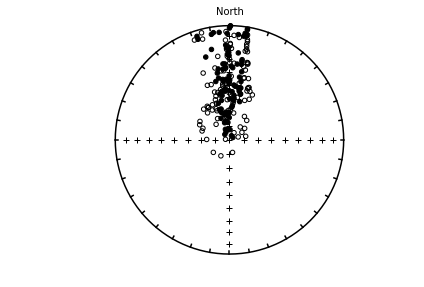

In [49]:
DIs=pmag.get_unf(200).transpose()
dir_lons=DIs[0]
dir_lats=DIs[1]
decs,incs,ints=[],[],[]
for k in range(len(dir_lons)):
    x,y,z,f=pmag.doigrf(dir_lons[k],dir_lats[k],0,2018)
    dirs=pmag.cart2dir([x,y,z])
    decs.append(dirs[0])
    incs.append(dirs[1])
    ints.append(dirs[2]*1e-3)
# plt.figure(num=1,figsize=(4,4))
ipmag.plot_net(fignum=1) # plots the equal area net
ipmag.plot_di(dec=decs,inc=incs) # puts on the data
plt.text(0,1.1,'North',ha='center')
plt.savefig('igrf_b.eps');

    

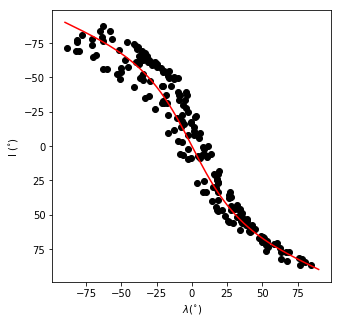

In [58]:
plt.figure(2,(5,5))
plt.plot(dir_lats,incs,'ko')
model_lats=np.arange(-90,91,1)
model_incs=np.degrees(np.arctan(2.*np.tan(np.radians(model_lats))))
plt.plot(model_lats,model_incs,'r-')
plt.ylim(99,-99)
plt.xlim(-99,99)
plt.xlabel('$\lambda (^{\circ}$)')
plt.ylabel('I ($^{\circ}$)')
plt.savefig('igrf_c.eps')

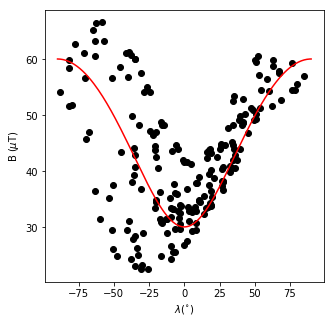

In [59]:
plt.figure(3,(5,5))
Bo=30
model_clats=np.arange(0,181,1)
model_ints=Bo*np.sqrt(1.+3.*np.cos(np.radians(model_clats))**2)
plt.plot(dir_lats,ints,'ko')
plt.plot(model_lats,model_ints,'r-')
plt.xlabel('$\lambda (^{\circ}$)')
plt.ylabel('B ($\mu$T)')
plt.savefig('igrf_d.eps')

/Users/ltauxe/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


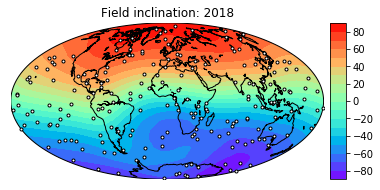

In [63]:
date,mod,lon_0,el,alt,ghfile=2018,"cals10k",0,'I',0,""
lincr=10
cmap='rainbow'
Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,el=el,alt=alt,file=ghfile)
m = Basemap(projection='hammer',lon_0=lon_0)
x,y=m(*meshgrid(lons,lats))
m.drawcoastlines()
if mod=='custom':
     d='Custom'
else: d=str(date)
if el=='B':
    levmax=Bs.max()+lincr
    levmin=round(Bs.min()-lincr)
    levels=np.arange(levmin,levmax,lincr)
    cs=m.contourf(x,y,Bs,levels=levels,cmap=cmap)
    plt.title('Field strength ($\mu$T): '+d);
if el=='Br':
    levmax=Brs.max()+lincr
    levmin=round(Brs.min()-lincr)
    cs=m.contourf(x,y,Brs,levels=np.arange(levmin,levmax,lincr),cmap=cmap)
    plt.title('Radial field strength ($\mu$T): '+str(date));
if el=='I':
    levmax=Is.max()+lincr
    levmin=round(Is.min()-lincr)
    cs=m.contourf(x,y,Is,levels=np.arange(-90,100,10),cmap=cmap)
    #m.contour(x,y,Is,levels=np.arange(-80,90,10),colors='black')
    plt.title('Field inclination: '+str(date));
if el=='D':
        #cs=m.contourf(x,y,Ds,levels=np.arange(-180,180,10),cmap=cmap)
    cs=m.contourf(x,y,Ds,levels=np.arange(-180,180,20),cmap=cmap)
    #m.contour(x,y,Ds,levels=np.arange(-180,180,10),colors='black')
    plt.title('Field declination: '+str(date));
cbar=m.colorbar(cs,location='right')
x,y=m(dir_lons,dir_lats)
plt.plot(x,y,'w.',markeredgecolor='black')
plt.savefig('igrf_a.eps');

